In [144]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 


import seaborn as sns
%matplotlib inline

In [145]:
from sklearn.datasets import load_boston

In [146]:
load_boston=load_boston()

In [147]:
x=load_boston.data
y=load_boston.target



In [148]:
data=pd.DataFrame(x , columns= load_boston.feature_names)
data["Saleprice"]=y
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Saleprice
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [149]:
print (load_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

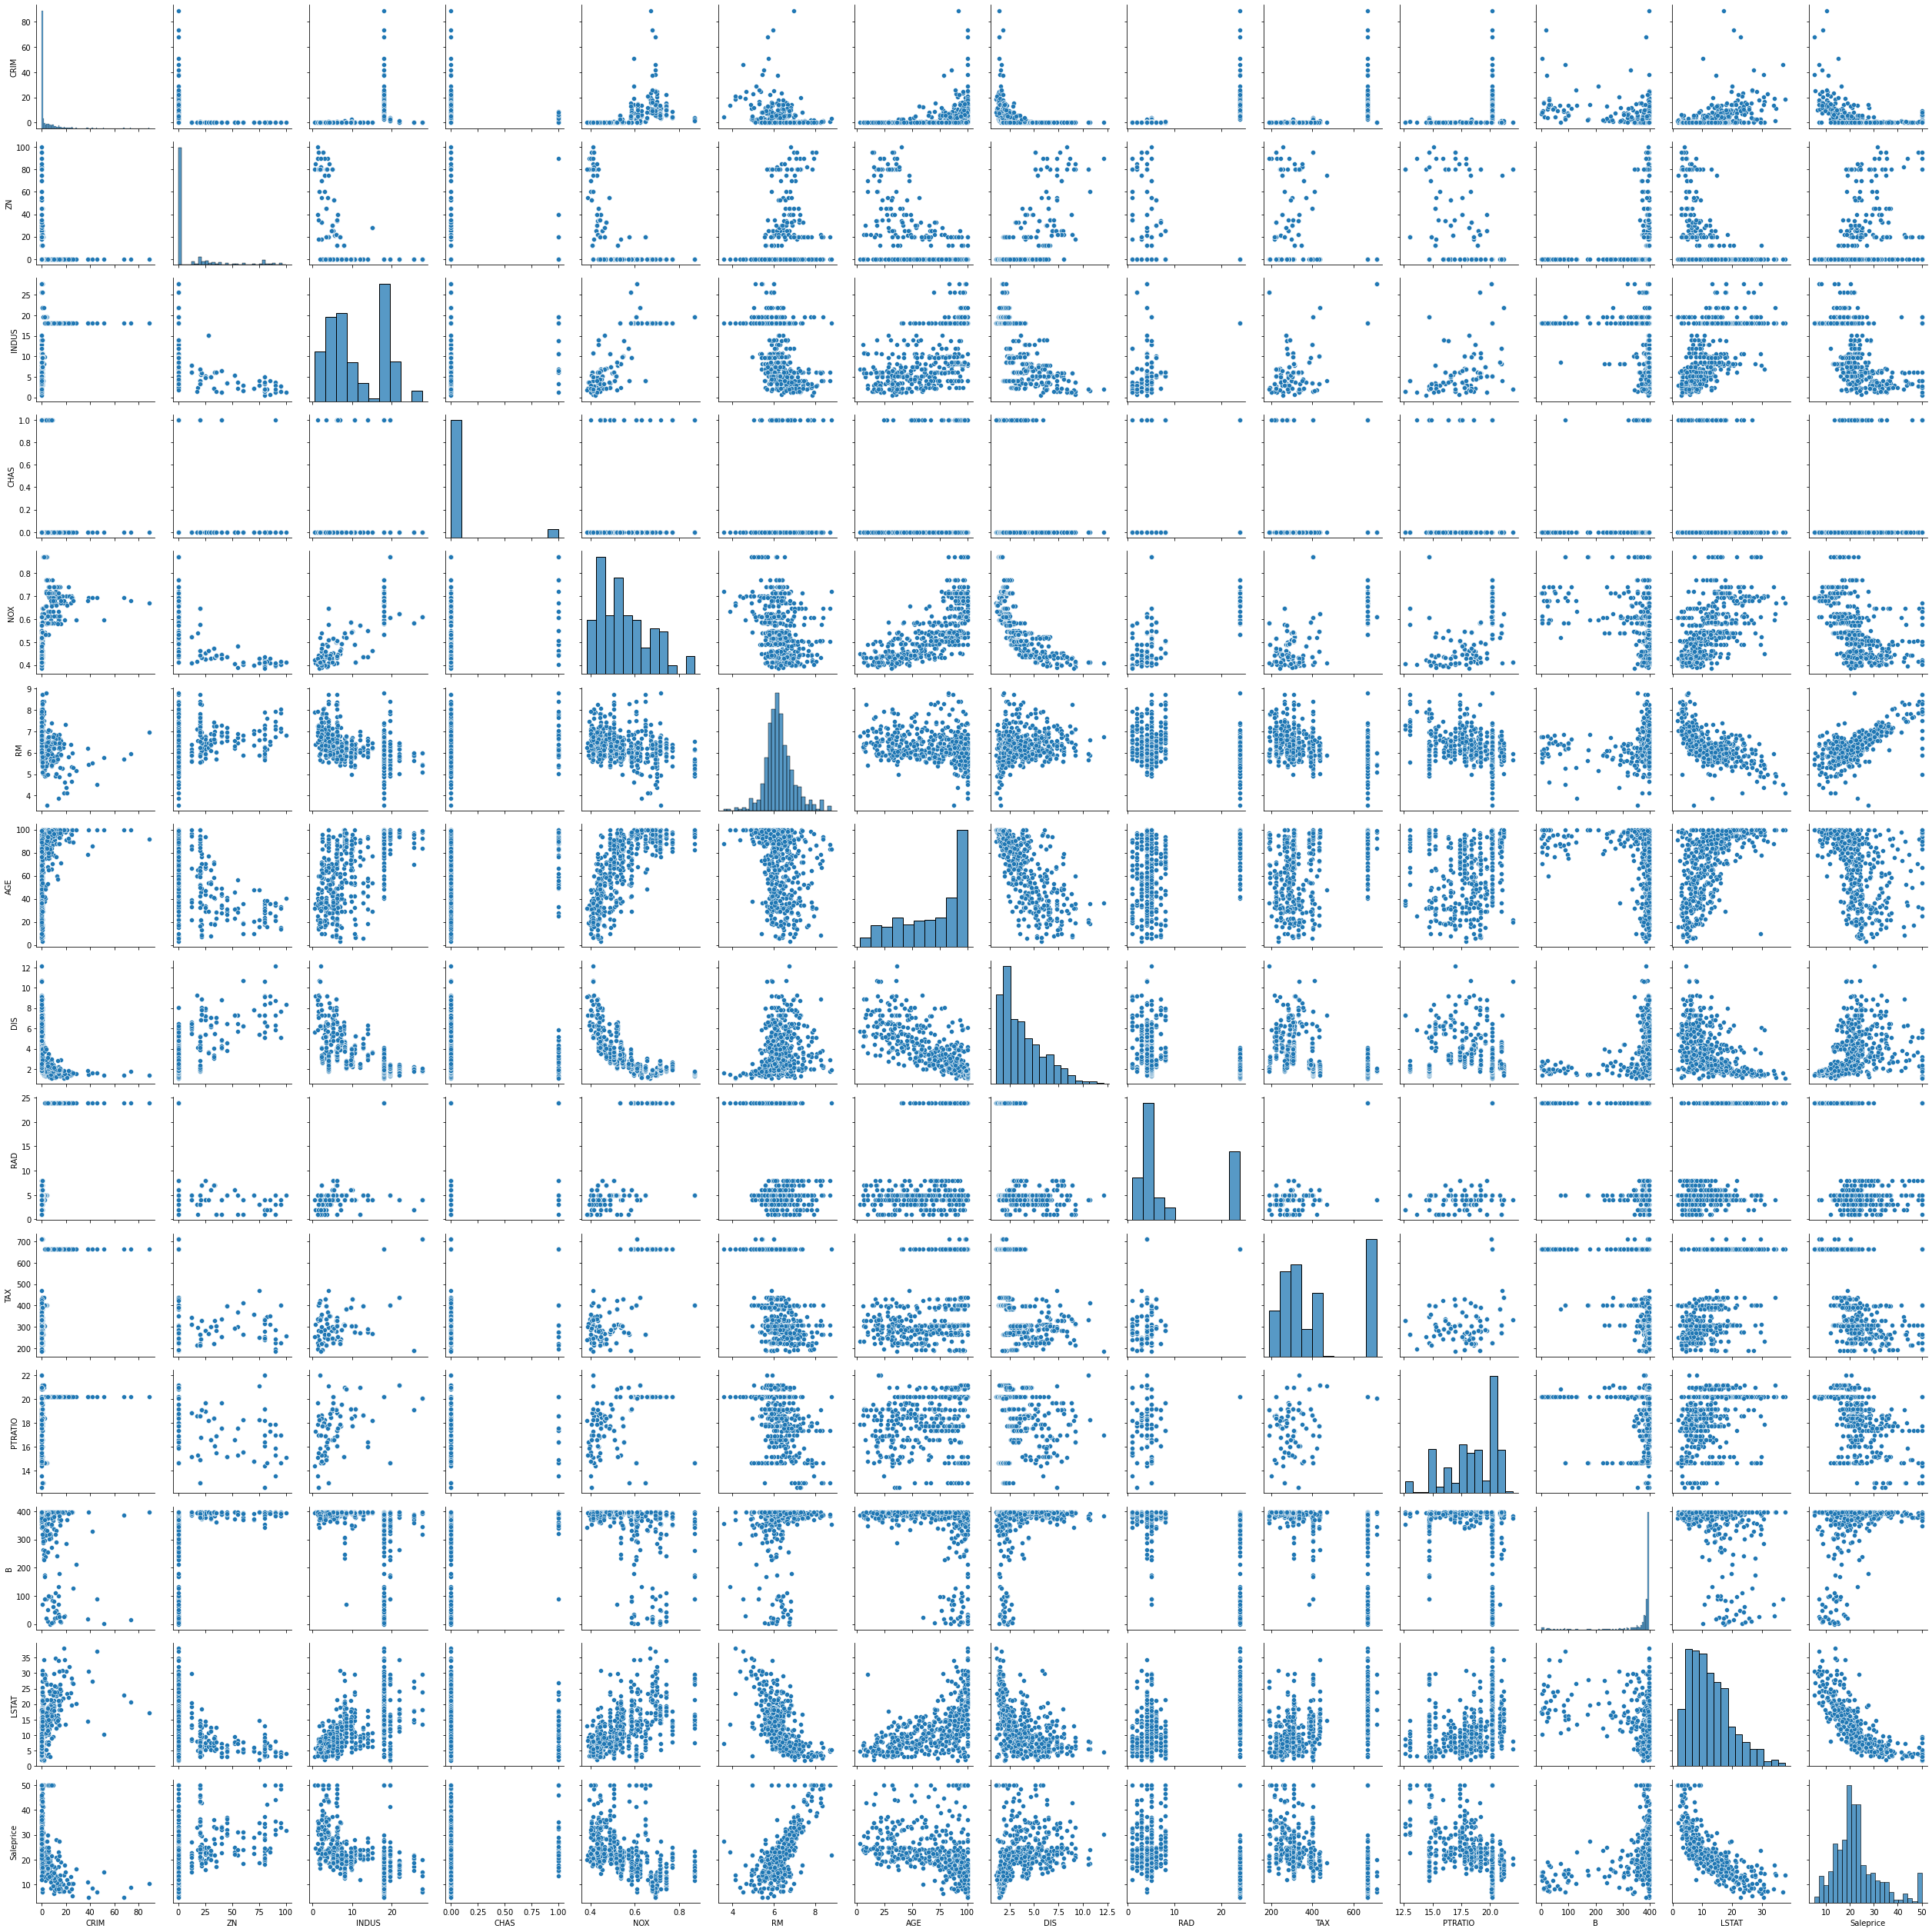

In [150]:
sns.pairplot (data,height=2.5)
plt.tight_layout()

C:\Users\Drosxo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


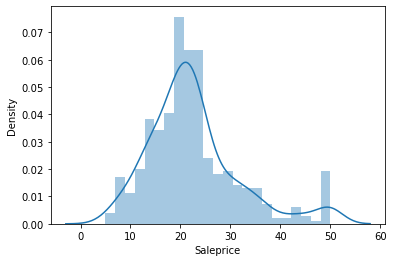

In [151]:
sns.distplot(data['Saleprice']);

In [152]:
print('Skewness: %f ' % data['Saleprice'].skew())
print('Kurtosis: %f ' % data['Saleprice'].kurt())

Skewness: 1.108098 
Kurtosis: 1.495197 


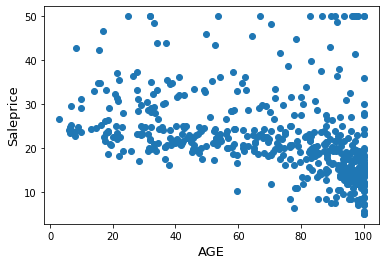

In [153]:
fig,ax=plt.subplots()
ax.scatter(x=data['AGE'],y=data['Saleprice'])
plt.xlabel('AGE',fontsize=13)
plt.ylabel('Saleprice',fontsize=13)
plt.show()
    

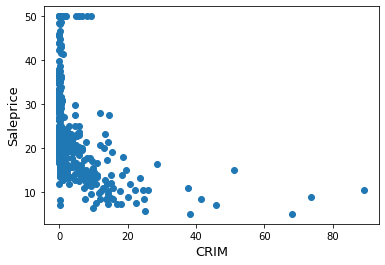

In [154]:
fig,ax=plt.subplots()
ax.scatter(x=data['CRIM'],y=data['Saleprice'])
plt.xlabel('CRIM',fontsize=13)
plt.ylabel('Saleprice',fontsize=13)
plt.show()

C:\Users\Drosxo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu= 22.53 and sigma= 9.19 


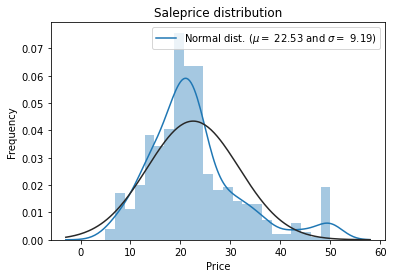

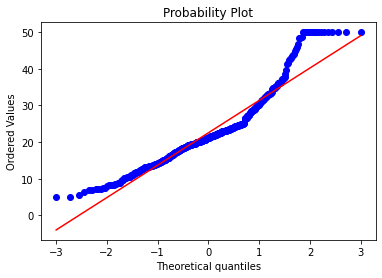

In [155]:
from scipy import stats
from scipy.stats import skew,norm
sns.distplot(data['Saleprice'],fit=norm);
(mu,sigma)=norm.fit(data['Saleprice'])
print ('\n mu= {:.2f} and sigma= {:.2f} '.format(mu,sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Saleprice distribution')


#QQplot
fig=plt.figure()
res=stats.probplot(data['Saleprice'],plot=plt)
plt.show()


 mu= 3.09 and sigma= 0.39 


C:\Users\Drosxo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Saleprice distribution')

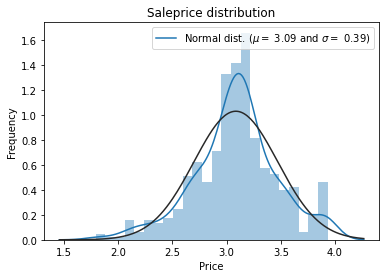

In [156]:
data['Saleprice']=np.log1p(data['Saleprice'])
sns.distplot(data['Saleprice'],fit=norm);
(mu,sigma)=norm.fit(data['Saleprice'])
print ('\n mu= {:.2f} and sigma= {:.2f} '.format(mu,sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu,sigma)],
           loc='best')
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Saleprice distribution')



In [157]:
data['Saleprice']


0      3.218876
1      3.117950
2      3.575151
3      3.538057
4      3.616309
         ...   
501    3.152736
502    3.072693
503    3.214868
504    3.135494
505    2.557227
Name: Saleprice, Length: 506, dtype: float64

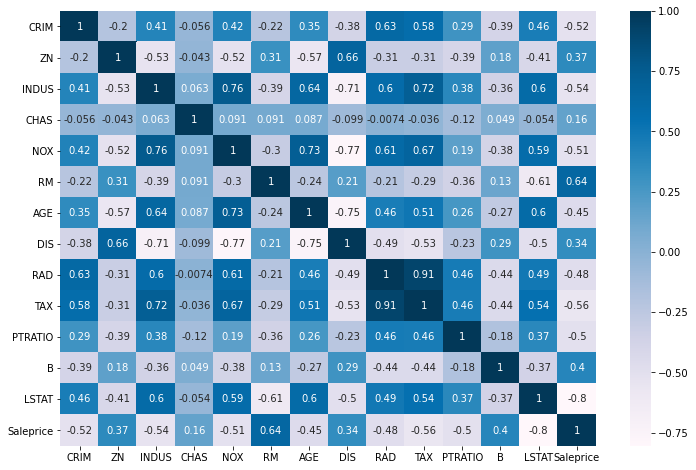

In [158]:
plt.figure(figsize=(12,8))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [159]:
cor_target=abs(cor['Saleprice']) #Absolute values of corelation
cor_target
relevant_features = cor_target[(cor_target>0.2) ]#selecting the most relevant features
names = [index for index, value in relevant_features.iteritems()] # getting the names of the features 
names


['CRIM',
 'ZN',
 'INDUS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'Saleprice']

In [160]:
names.remove('Saleprice')


In [161]:
print(names) # printing the features 
print(len(names))

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
12


In [163]:
y = data['Saleprice']
y

0      3.218876
1      3.117950
2      3.575151
3      3.538057
4      3.616309
         ...   
501    3.152736
502    3.072693
503    3.214868
504    3.135494
505    2.557227
Name: Saleprice, Length: 506, dtype: float64

In [167]:
from sklearn.model_selection import train_test_split 


X=data.drop(['Saleprice'],axis=1)
X


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [168]:
y= data['Saleprice']
y

0      3.218876
1      3.117950
2      3.575151
3      3.538057
4      3.616309
         ...   
501    3.152736
502    3.072693
503    3.214868
504    3.135494
505    2.557227
Name: Saleprice, Length: 506, dtype: float64

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42) #training samples=80% test samples=20%

In [170]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [171]:
from sklearn.linear_model import LinearRegression 

lr = LinearRegression() 
lr.fit(X_train, y_train) #fitting ta training samples

LinearRegression()

In [191]:
predictions = lr.predict(X_test)  
print("Actual value of the house:- ", y_test[0]) 
print("Model Predicted Value:- ", predictions[0])

Actual value of the house:-  3.2188758248682006
Model Predicted Value:-  3.3668949799969603


In [192]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, predictions) 
rmse = np.sqrt(mse)
print(rmse)

0.18795843289241634
